# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [ ]:
import pandas as pd

# Load data
df = pd.read_csv(
'/content/reviews.csv',
)

df.info()
df.head()

## Preparing features (`X`) & target (`y`)

In [ ]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


## Data Exploration

In [ ]:
# Numerical columns
print(df.describe())

# Categorical columns
print(df.describe(include='object'))


        Clothing ID           Age  Positive Feedback Count  Recommended IND
count  18442.000000  18442.000000             18442.000000     18442.000000
mean     954.896757     43.383635                 2.697484         0.816235
std      141.571783     12.246264                 5.942220         0.387303
min        2.000000     18.000000                 0.000000         0.000000
25%      863.000000     34.000000                 0.000000         1.000000
50%      952.000000     41.000000                 1.000000         1.000000
75%     1078.000000     52.000000                 3.000000         1.000000
max     1205.000000     99.000000               122.000000         1.000000
           Title                                        Review Text  \
count      18442                                              18442   
unique     13142                                              18439   
top     Love it!  The sweater and skirt are so pretty! they're r...   
freq         129                

In [ ]:
import wordcloud
import PIL

print("WordCloud version:", wordcloud.__version__)  # Should be >= 1.8.1
print("Pillow version:", PIL.__version__)            # Should be >= 8.0.0


WordCloud version: 1.9.4
Pillow version: 11.1.0


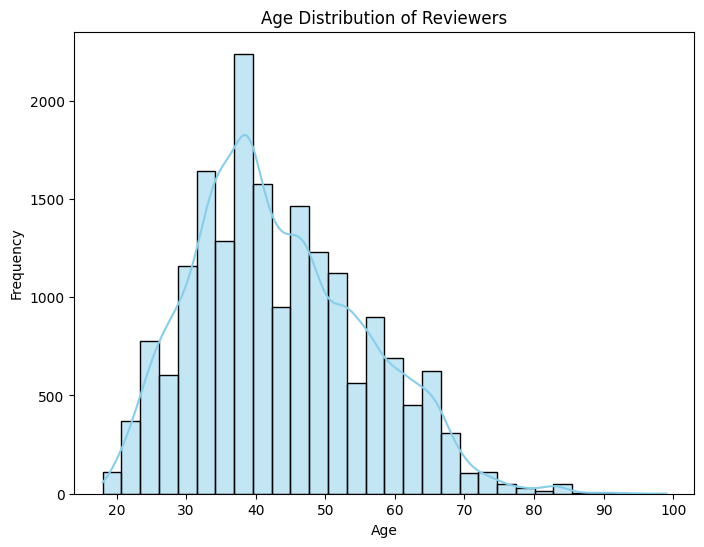

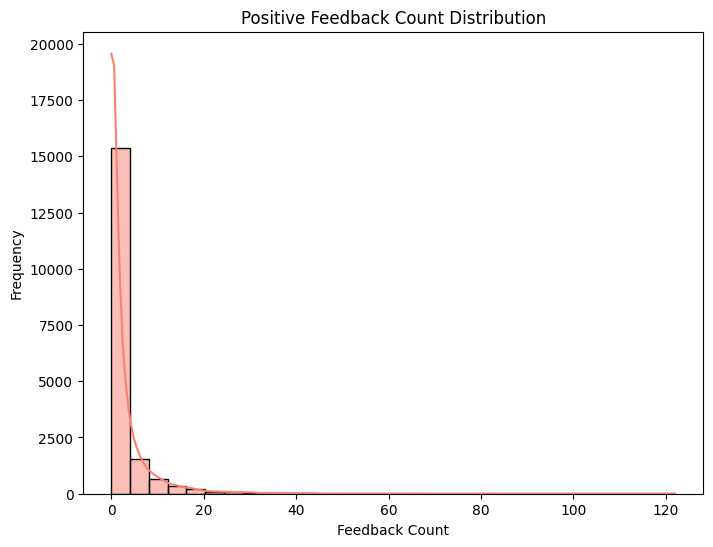

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Reviewers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Positive Feedback Count
plt.figure(figsize=(8, 6))
sns.histplot(df['Positive Feedback Count'], bins=30, kde=True, color='salmon')
plt.title('Positive Feedback Count Distribution')
plt.xlabel('Feedback Count')
plt.ylabel('Frequency')
plt.show()


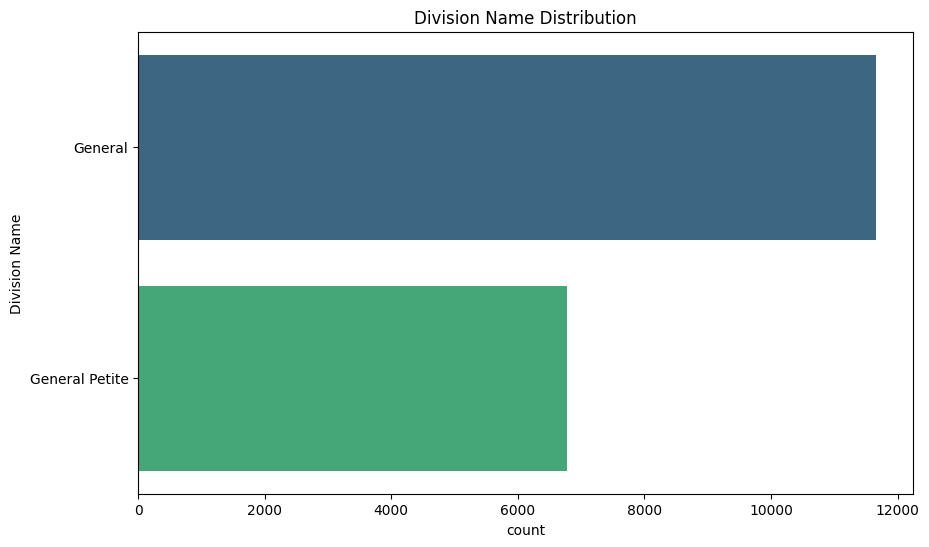

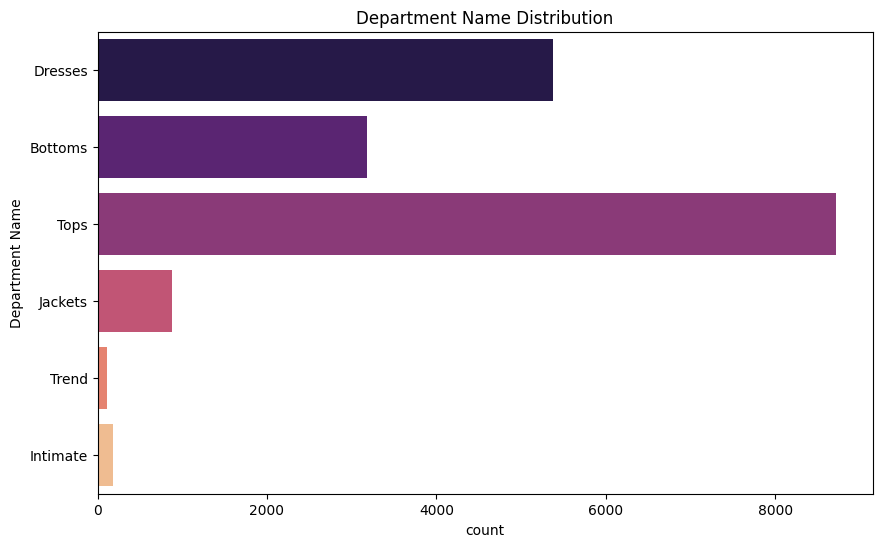

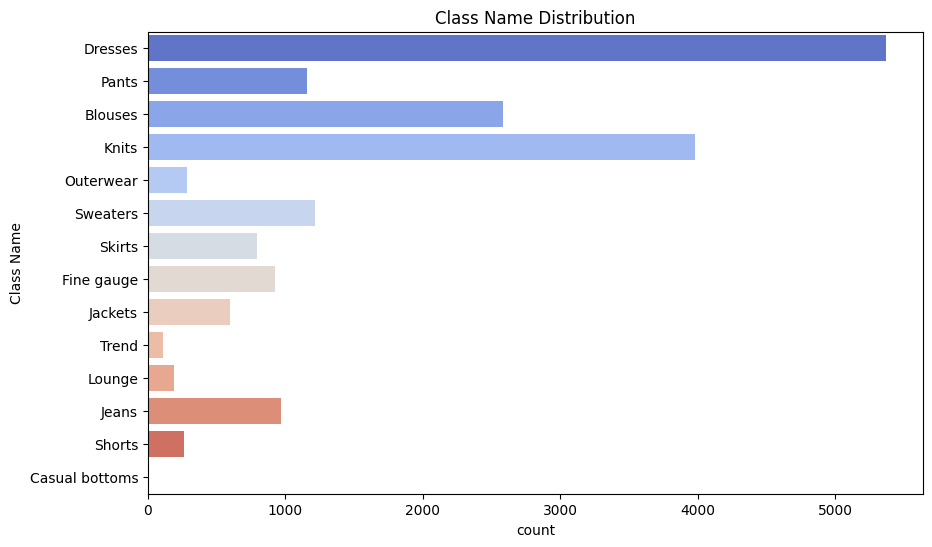

In [ ]:
# Count plots for categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(y='Division Name', data=df, hue='Division Name', palette='viridis')
plt.title('Division Name Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(y='Department Name', data=df, hue='Department Name',palette='magma')
plt.title('Department Name Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(y='Class Name', data=df, hue='Class Name',palette='coolwarm')
plt.title('Class Name Distribution')
plt.show()


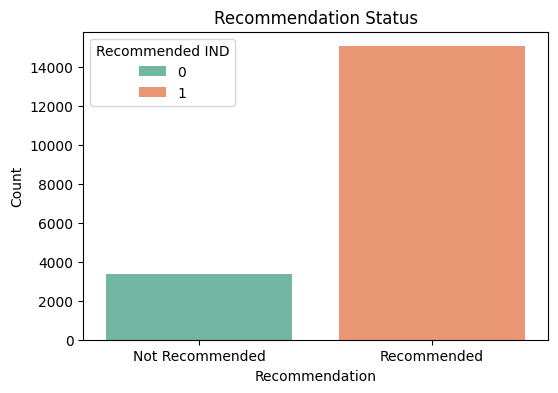

In [ ]:
# Recommended vs Not Recommended
plt.figure(figsize=(6, 4))
sns.countplot(x='Recommended IND', data=df, hue= 'Recommended IND',  palette='Set2')
plt.xticks([0, 1], ['Not Recommended', 'Recommended'])
plt.title('Recommendation Status')
plt.xlabel('Recommendation')
plt.ylabel('Count')
plt.show()


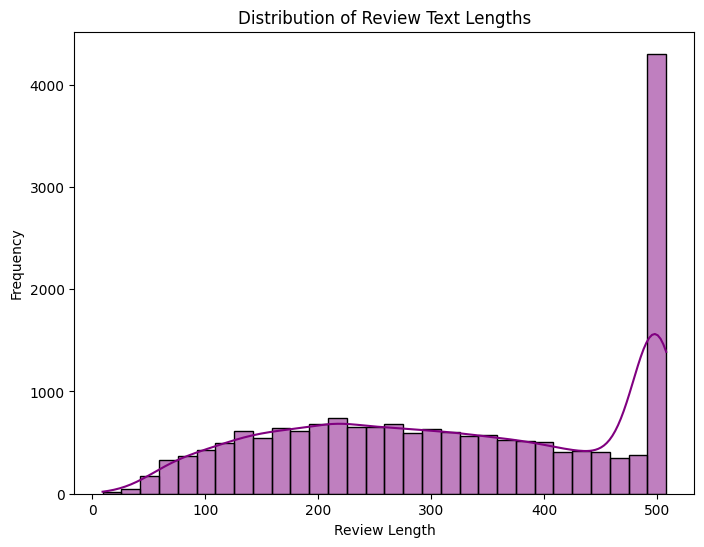

In [ ]:
# Review Length Distribution
df['Review Length'] = df['Review Text'].apply(lambda x: len(str(x)))
plt.figure(figsize=(8, 6))
sns.histplot(df['Review Length'], bins=30, kde=True, color='purple')
plt.title('Distribution of Review Text Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()


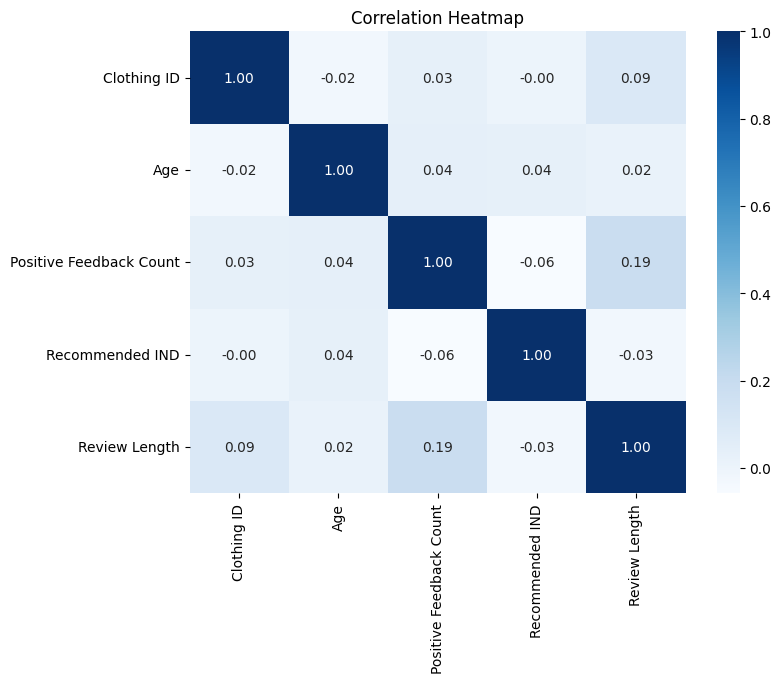

In [ ]:
# Correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns


# Selecting only numerical columns for correlation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Generating word frequencies
Let's first generate a frequency table of all the words present in all the reviews combined.

In [ ]:
def gen_freq(text):
    # store all words in list
    words_list = []

    # Loop over all the words and extract word from list
    for word in text.split():
        words_list.extend(word)

    # Generate word frequencies using value counts in word_list
    word_freq = pd.Series(words_list).value_counts()

    return word_freq

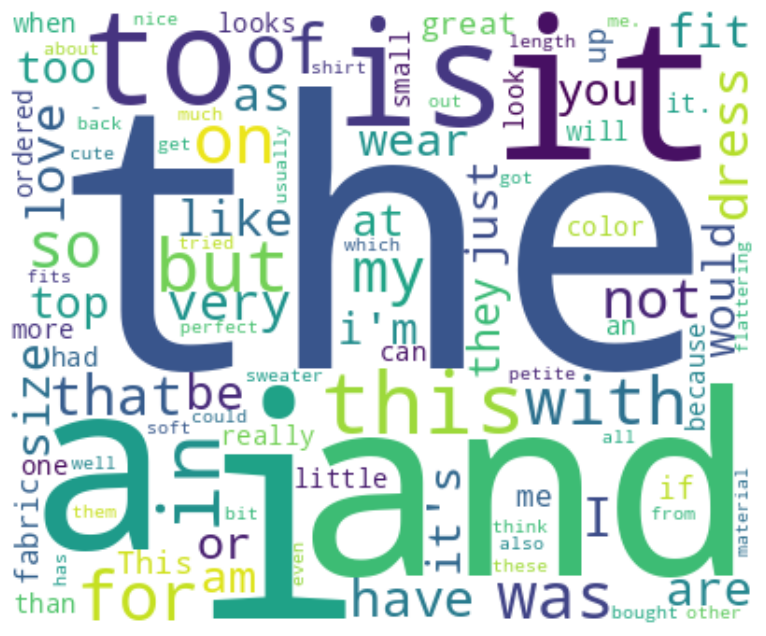

In [ ]:
#Import library WordCloud
from wordcloud import WordCloud

# Generate word cloud
wc = WordCloud(width=400,
               height=330,
               max_words=100,
               background_color='white').generate_from_frequencies(gen_freq(df['Review Text'].str))

plt.figure(figsize=(14,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Building Pipeline

In [ ]:
# Use sklearn in creating a pipeline
from sklearn.pipeline import Pipeline

In [ ]:
# split data into numerical, categorical, and text features

num_features = (
    X
    .select_dtypes(exclude=['object']).columns

)
print('Numerical features:', num_features)

cat_features = (
    X[[
        'Title', 'Review Text','Division Name', 'Department Name', 'Class Name'
    ]].columns
)
print('Categorical features:', cat_features)


text_features = (
    X[[
        'Review Text',
    ]].columns
)
print ('Review Text features:', text_features)


Numerical features: Index(['Clothing ID', 'Age', 'Positive Feedback Count'], dtype='object')
Categorical features: Index(['Title', 'Review Text', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')
Review Text features: Index(['Review Text'], dtype='object')


In [ ]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

In [ ]:
#define pipeline for numerical features
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

num_pipeline = Pipeline([
    (
        'imputer',
        SimpleImputer(strategy='mean'),
    ),
    (
        'scaler',
        MinMaxScaler(),
    ),
])

num_pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler())])

In [ ]:
# define pipeline for categorical features
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    (
        'ordinal_encoder',
        OrdinalEncoder(
            handle_unknown='use_encoded_value',
            unknown_value=-1,
        )
    ),
    (
        'imputer',
        SimpleImputer(
            strategy='most_frequent',
        )
    ),
    (
        'cat_encoder',
        OneHotEncoder(
            handle_unknown='ignore',
        )
    ),
])

cat_pipeline

Pipeline(steps=[('ordinal_encoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('cat_encoder', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
# Takes in a string for the character to count
# Outputs the number times that character appears in the text

class CountCharacter(BaseEstimator, TransformerMixin):
    def __init__(self, character: str):
        self.character = character

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [[text.count(self.character)] for text in X]

In [ ]:
import numpy as np
import spacy
import tensorflow as tf

print(np.__version__)
print(spacy.__version__)
print(tf.__version__)


1.26.4
3.7.5
2.18.0


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import spacy

# Extracts POS tags and counts them dynamically
class PosExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, nlp):
        self.nlp = nlp

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Collect all unique POS tags dynamically
        all_pos_tags = set()
        for text in X:
            doc = self.nlp(text)
            all_pos_tags.update(token.pos_ for token in doc)

        # Generate a feature matrix based on POS tag counts
        feature_matrix = []
        for text in X:
            doc = self.nlp(text)
            pos_counts = {pos: 0 for pos in all_pos_tags}
            for token in doc:
                pos_counts[token.pos_] += 1
            feature_matrix.append(list(pos_counts.values()))

        return feature_matrix


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import spacy

# Extracts named entities and groups them by their entity labels
class EntityExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, nlp):
        self.nlp = nlp

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Collect all unique entity labels dynamically
        all_labels = set()
        for text in X:
            doc = self.nlp(text)
            all_labels.update(ent.label_ for ent in doc.ents)

        # Generate a feature matrix based on entity label counts
        feature_matrix = []
        for text in X:
            doc = self.nlp(text)
            label_counts = {label: 0 for label in all_labels}
            for ent in doc.ents:
                label_counts[ent.label_] += 1
            feature_matrix.append(list(label_counts.values()))

        return feature_matrix


In [ ]:
# Using FeatureUnion to be useful in your pipeline.
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
import numpy as np

initial_text_preprocess = Pipeline([
    (
        'dimension_reshaper',
        FunctionTransformer(
            np.reshape,
            kw_args={'newshape':-1},
        ),
    ),
])

# Create a pipeline for counting the number of spaces, `!`, and `?`


feature_engineering = FeatureUnion([
    ('count_spaces', CountCharacter(character=' ')),
    ('count_exclamations', CountCharacter(character='!')),
    ('count_question_marks', CountCharacter(character='?')),
#     ('pos_counts', FunctionTransformer(
#     lambda X: np.array(PosExtractor(nlp).fit_transform(X)).reshape(len(X), -1)
# )),
# ('entity_counts', FunctionTransformer(
#     lambda X: np.array(EntityExtractor(nlp).fit_transform(X)).reshape(len(X), -1)
# )),
])

character_counts_pipeline = Pipeline([
    (
        'initial_text_preprocess',
        initial_text_preprocess,
    ),
    (
        'feature_engineering',
        feature_engineering,
    ),
])
character_counts_pipeline

Pipeline(steps=[('initial_text_preprocess',
                 Pipeline(steps=[('dimension_reshaper',
                                  FunctionTransformer(func=<function reshape at 0x7f1170d6c830>,
                                                      kw_args={'newshape': -1}))])),
                ('feature_engineering',
                 FeatureUnion(transformer_list=[('count_spaces',
                                                 CountCharacter(character=' ')),
                                                ('count_exclamations',
                                                 CountCharacter(character='!')),
                                                ('count_question_marks',
                                                 CountCharacter(character='?'))]))])

In [ ]:
! python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 45.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Create Custom Transformer: spaCy , SpacyLemmatizer and TF-IDF

import spacy

nlp = spacy.load('en_core_web_sm')

class SpacyLemmatizer(BaseEstimator, TransformerMixin):
    def __init__(self, nlp):
        self.nlp = nlp

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        lemmatized = [
            ' '.join(
                token.lemma_ for token in doc
                if not token.is_stop
            )
            for doc in self.nlp.pipe(X)
        ]
        return lemmatized

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_pipeline = Pipeline([
    (
        'dimension_reshaper',
        FunctionTransformer(
            np.reshape,
            kw_args={'newshape':-1},
        ),
    ),
    (
        'lemmatizer',
        SpacyLemmatizer(nlp=nlp),
    ),
    (
        'tfidf_vectorizer',
        TfidfVectorizer(
            stop_words='english',
        ),
    ),
])
tfidf_pipeline

Pipeline(steps=[('dimension_reshaper',
                 FunctionTransformer(func=<function reshape at 0x7f1170d6c830>,
                                     kw_args={'newshape': -1})),
                ('lemmatizer',
                 SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x7f10053af790>)),
                ('tfidf_vectorizer', TfidfVectorizer(stop_words='english'))])

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import spacy
import numpy as np

class POSAndNERTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, nlp,
                 pos_tags: list = ['NOUN', 'VERB', 'ADJ', 'ADV'],
                 entity_types: list = ['PERSON', 'ORG', 'GPE', 'DATE']):
        """
        :param model: spaCy model to use (default is 'en_core_web_sm').
        :param pos_tags: List of POS tags to extract.
        :param entity_types: List of entity types to extract.
        """

        self.pos_tags = pos_tags
        self.entity_types = entity_types
        self.nlp = nlp

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X['Review Text'].to_list()

        if not isinstance(X, (list, np.ndarray)):
            raise ValueError(f"Input should be a list of strings, but got {type(X)}")

        transformed_data = []
        for text in X:
            if not isinstance(text, str):
                raise ValueError(f"Each input element should be a string, but got {type(text)}")

            doc = self.nlp(text)

            # Initialize counts with 0 for all possible tags/types
            pos_counts = {tag: 0 for tag in self.pos_tags}
            entity_counts = {etype: 0 for etype in self.entity_types}

            # Count POS tags
            for token in doc:
                if token.pos_ in pos_counts:
                    pos_counts[token.pos_] += 1

            # Count NER entities
            for ent in doc.ents:
                if ent.label_ in entity_counts:
                    entity_counts[ent.label_] += 1

            # Combine counts into a feature vector
            features = list(pos_counts.values()) + list(entity_counts.values())
            transformed_data.append(features)

        # Convert to a NumPy array with consistent shape
        return np.array(transformed_data)

In [ ]:
POSAndNER_pipeline = Pipeline([

    (
        'POSAndNERTransformer',
        POSAndNERTransformer(nlp),
    )
])
POSAndNER_pipeline

Pipeline(steps=[('POSAndNERTransformer',
                 POSAndNERTransformer(nlp=<spacy.lang.en.English object at 0x7f10053af790>))])

In [ ]:
# Combine Feature Engineering Pipelines
from sklearn.compose import ColumnTransformer

feature_engineering = ColumnTransformer([
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features),
        ('pos_ner', POSAndNER_pipeline, text_features),
        ('character_counts', character_counts_pipeline, text_features),
        ('tfidf_text', tfidf_pipeline, text_features),

])

feature_engineering

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 Index(['Clothing ID', 'Age', 'Positive Feedback Count'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1)),
                                                 ('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_en...
                                 Index(['Review Text'], dtype='object')),
                                ('tfidf_text',
                                 Pipeline(steps=[('dimension_reshaper',
                                                  FunctionTransformer(func=<function reshape at 0x7f1170d6c830>,
                                                                      kw_args={'newshape': -1})),
                                                 ('lemmatizer',
                                                  SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x7f10053af790>)),
                                                 ('tfidf_vectorizer',
                                                  TfidfVectorizer(stop_words='english'))]),
                                 Index(['Review Text'], dtype='object'))])

In [ ]:
print(X_train.shape)

(16597, 8)


In [ ]:
for name, transformer, columns in feature_engineering.transformers:
    try:
        X_temp = transformer.fit_transform(X_train[columns])
        print(f"Transformer '{name}' output shape: {X_temp.shape}")
    except Exception as e:
        print(f"Transformer '{name}' failed: {e}")


Transformer 'num' output shape: (16597, 3)
Transformer 'cat' output shape: (16597, 28571)
Transformer 'pos_ner' output shape: (16597, 8)
Transformer 'character_counts' output shape: (16597, 3)
Transformer 'tfidf_text' output shape: (16597, 9934)


In [ ]:
X_temp

<16597x9934 sparse matrix of type '<class 'numpy.float64'>'
	with 369059 stored elements in Compressed Sparse Row format>

In [ ]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

## Training Pipeline

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

model_pipeline = make_pipeline(
    feature_engineering,
    RandomForestClassifier(random_state=27, verbose=1),
)

model_pipeline.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   21.1s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Clothing ID', 'Age', 'Positive Feedback Count'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('imputer',
                                                                   SimpleImpute...
                                                  Pipeline(steps=[('dimension_reshaper',
                                                                   FunctionTransformer(func=<function reshape at 0x7f1170d6c830>,
                                                                                       kw_args={'newshape': -1})),
                                                                  ('lemmatizer',
                                                                   SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x7f10053af790>)),
                                                                  ('tfidf_vectorizer',
                                                                   TfidfVectorizer(stop_words='english'))]),
                                                  Index(['Review Text'], dtype='object'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=27, verbose=1))])

In [ ]:
# let's observe the accuracy of the model

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Predict on the test set
y_pred = model_pipeline.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class scenarios
recall = recall_score(y_test, y_pred, average='weighted')
print('Accuracy:', accuracy)
print('precision:', precision)
print('recall:', recall)

/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


Accuracy: 0.8368563685636856
precision: 0.8303506961928435
recall: 0.8368563685636856


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


Accuracy: 0.8369
Precision: 0.8304
Recall: 0.8369

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.11      0.19       327
           1       0.84      0.99      0.91      1518

    accuracy                           0.84      1845
   macro avg       0.82      0.55      0.55      1845
weighted avg       0.83      0.84      0.78      1845



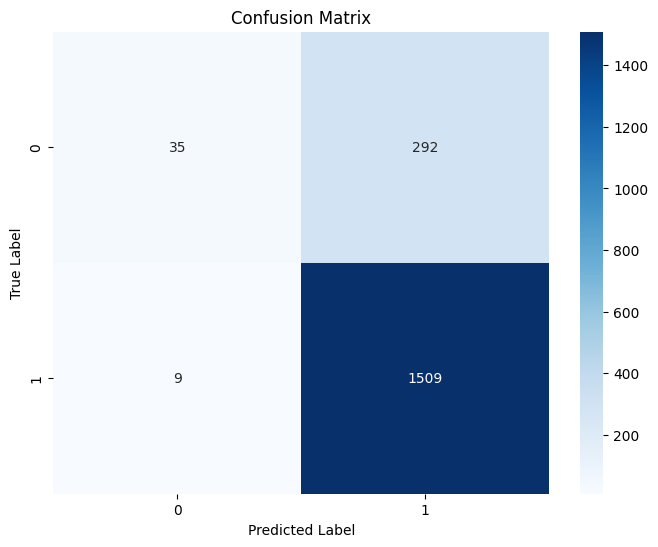

In [ ]:
# Display the results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


## Fine-Tuning Pipeline

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Refined hyperparameter search space
my_distributions = dict(
    randomforestclassifier__n_estimators=[100, 150, 200, 250],
    randomforestclassifier__max_features=['auto', 'sqrt', 'log2'],
    randomforestclassifier__max_depth=[None, 10, 20, 30, 40],
    randomforestclassifier__min_samples_split=[2, 5, 10],
    randomforestclassifier__min_samples_leaf=[1, 2, 4],
    randomforestclassifier__bootstrap=[True, False],
    randomforestclassifier__criterion=['gini', 'entropy', 'log_loss'],
)

param_search = RandomizedSearchCV(
    estimator=model_pipeline,
    param_distributions=my_distributions,
    n_iter=20,     # Increased number of iterations for a broader search
    cv=5,          # 5-fold cross-validation
    n_jobs=-1,     # Utilize all available processors
    refit=True,
    verbose=3,
    random_state=27,
)

# Fit the parameter search to the data
param_search.fit(X_train, y_train)

# Retrieve the best parameters
print(param_search.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
model_best = param_search.best_estimator_
model_best

In [ ]:
y_pred_forest_pipeline = model_best.predict(X_test)
accuracy_forest_pipeline = accuracy_score(y_test, y_pred_forest_pipeline)

print('Accuracy:', accuracy_forest_pipeline)

In [ ]:
import pickle

# Save the model pipeline to a pickle file
with open('model_pipeline.pkl', 'wb') as f:
    pickle.dump(model_best, f)
